# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [ ]:
% load_ext autoreload

UsageError: Line magic function `%` not found.


In [ ]:
% autoreload 2

from boosting import Boosting

UsageError: Line magic function `%` not found.


In [4]:
from __future__ import annotations

from collections import defaultdict

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor


def score(clf, x, y):
    return roc_auc_score(y == 1, clf.predict_proba(x)[:, 1])

class Boosting:

    def __init__(
            self,
            base_model_params: dict = None,
            n_estimators: int = 10,
            learning_rate: float = 0.1,
            subsample: float = 0.3,
            early_stopping_rounds: int = None,
            plot: bool = False,
    ):
        self.base_model_class = DecisionTreeRegressor
        self.base_model_params: dict = {} if base_model_params is None else base_model_params

        self.n_estimators: int = n_estimators

        self.models: list = []
        self.gammas: list = []

        self.learning_rate: float = learning_rate
        self.subsample: float = subsample

        self.early_stopping_rounds: int = early_stopping_rounds
        if early_stopping_rounds is not None:
#             self.validation_loss = np.full(self.early_stopping_rounds, np.inf)
            self.validation_loss = []

        self.plot: bool = plot

        self.history = defaultdict(list)

        self.sigmoid = lambda x: 1 / (1 + np.exp(-x))
        self.loss_fn = lambda y, z: -np.log(self.sigmoid(y * z)).mean()
        self.loss_derivative = lambda y, z: -y * self.sigmoid(-y * z)

    def fit_new_base_model(self, x, y, predictions):
        # бутстрап выборка:
        idx = np.random.randint(x.shape[0], size=int(np.round(self.subsample*x.shape[0])))
        x_boot = x[idx,:]

        s_i = -self.loss_derivative(y[idx], predictions[idx])

        base_model = self.base_model_class(**self.base_model_params)
        base_model.fit(x_boot, s_i)

        pred = base_model.predict(x)

        gamma_optim = self.find_optimal_gamma(y, predictions, pred)

        predictions = predictions + self.learning_rate*gamma_optim*pred

        self.models.append(base_model)
        self.gammas.append(gamma_optim)

        return predictions

    def fit(self, x_train, y_train, x_valid, y_valid):
        """
        :param x_train: features array (train set)
        :param y_train: targets array (train set)
        :param x_valid: features array (validation set)
        :param y_valid: targets array (validation set)
        """
        train_predictions = np.zeros(y_train.shape[0])
        valid_predictions = np.zeros(y_valid.shape[0])

        for i in range(self.n_estimators):
            train_predictions = self.fit_new_base_model(x_train, y_train, train_predictions)
            valid_predictions = valid_predictions + self.learning_rate*self.gammas[-1]*self.models[-1].predict(x_valid)
            train_loss = self.loss_fn(y_train, train_predictions)
            val_loss = self.loss_fn(y_valid, valid_predictions)

            self.history['train'].append(train_loss)
            self.history['val'].append(val_loss)

            if (self.early_stopping_rounds is not None) & (i > 0):
                diff = self.history['val'][i-1] - val_loss
                if np.abs(diff) <= 0.005:
                    self.validation_loss.append(val_loss)
                    if len(self.validation_loss) == self.early_stopping_rounds:
                        break
                    else:
                        continue
                else:
                    if len(self.validation_loss) == 0:
                        continue
                    else:
                        self.validation_loss = []

        if self.plot:
            plt.figure(figsize=(12, 7))
            length = len(self.history['train'])
            sns.lineplot(x=np.arange(1, length+1), y=self.history['train'])
            sns.lineplot(x=np.arange(1, length+1), y=self.history['val'])
            plt.legend(['train', 'validation'])


    def predict_proba(self, x):
        y_pred = np.zeros(x.shape[0])

        for gamma, model in zip(self.gammas, self.models):
            y_pred += self.learning_rate*gamma*model.predict(x)

        y_prob = self.sigmoid(y_pred)

        return np.transpose(np.array([1-y_prob, y_prob]))

    def find_optimal_gamma(self, y, old_predictions, new_predictions) -> float:
        gammas = np.linspace(start=0, stop=1, num=100)
        losses = [self.loss_fn(y, old_predictions + gamma * new_predictions) for gamma in gammas]

        return gammas[np.argmin(losses)]

    def score(self, x, y):
        return score(self, x, y)

    @property
    def feature_importances_(self):
        pass


### Проверка кода

У автора задания всё учится около одной секунды.

In [ ]:
boosting = Boosting()

import timeit

start = timeit.default_timer()

boosting.fit(x_train, y_train, x_valid, y_valid)

stop = timeit.default_timer()

print('Time: ', stop-start)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

Time:  0.8380359590009903
Train ROC-AUC 0.9891
Valid ROC-AUC 0.9117
Test ROC-AUC 0.9083


## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

In [ ]:
results1 = {'train':[], 'test':[]}

depths = range(1, 30, 2)

for depth in depths:
    boosting1 = Boosting(base_model_params={'max_depth':depth})
    boosting1.fit(x_train, y_train, x_valid, y_valid)
    train_score = boosting1.score(x_train, y_train)
    test_score = boosting1.score(x_test, y_test)
    results1['train'].append(train_score)
    results1['test'].append(test_score)


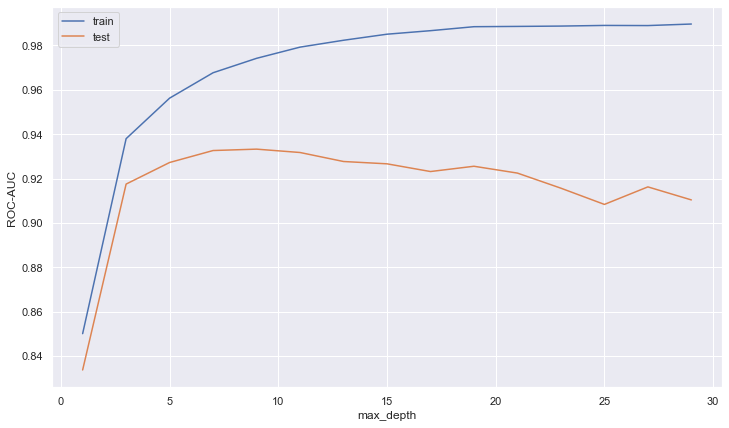

In [ ]:
plt.figure(figsize=(12, 7))
sns.lineplot(x=depths, y=results1['train'])
sns.lineplot(x=depths, y=results1['test'])
plt.legend(['train', 'test'])
plt.xlabel('max_depth')
plt.ylabel('ROC-AUC');

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Для обучающей выборки качество растет с увеличение глубины, потому что модель лучше подстаивается под данные, то есть переобучается. По этой причине чем больше глубина, тем лучше модель, с точки зрения обучающей выборки. Однако, поскольку модель переобучается с увеличением глубины, качество на тестовых данных падает. С точки зрения теста оптимально брать совсем небольшое значение глубины, в нашем случае 3.

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [ ]:
pip install optuna-dashboard

In [ ]:
import optuna
from sklearn.metrics import roc_auc_score
np.random.seed(1)

def objective(trial):

    max_depth = trial.suggest_int('max_depth', 2, 30)
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    learning_rate = trial.suggest_float('learning_rate', 0.1, 1.0)
    subsample = trial.suggest_float('subsample', 0.1, 1)
    early_stopping_rounds = trial.suggest_int('early_stopping_rounds', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 50)

    boosting_obj = Boosting(base_model_params={'max_depth':max_depth,
                                              'min_samples_leaf':min_samples_leaf,
                                              'min_samples_split':min_samples_split},
                           n_estimators=n_estimators,
                           learning_rate=learning_rate,
                           subsample=subsample,
                           early_stopping_rounds=early_stopping_rounds)

    boosting_obj.fit(x_train, y_train, x_valid, y_valid)

    error = -boosting_obj.score(x_valid, y_valid) # ROC-AUC берем с -, потому что задача минимизации

    return error  # An objective value linked with the Trial object.

study = optuna.create_study()  # Create a new study.
study.optimize(objective, n_trials=100)  # Invoke optimization of the objective function.

[I 2023-12-23 21:18:05,823] A new study created in memory with name: no-name-f850f886-a19b-47a7-b2bd-6c1500c21bec
[I 2023-12-23 21:18:07,649] Trial 0 finished with value: -0.9389296099320499 and parameters: {'max_depth': 10, 'n_estimators': 58, 'learning_rate': 0.4745339331930416, 'subsample': 0.9548004842119775, 'early_stopping_rounds': 7, 'min_samples_leaf': 35, 'min_samples_split': 19}. Best is trial 0 with value: -0.9389296099320499.
[I 2023-12-23 21:18:08,918] Trial 1 finished with value: -0.9381789113153948 and parameters: {'max_depth': 29, 'n_estimators': 91, 'learning_rate': 0.3980999647335266, 'subsample': 0.42464670792599546, 'early_stopping_rounds': 4, 'min_samples_leaf': 27, 'min_samples_split': 33}. Best is trial 0 with value: -0.9389296099320499.
[I 2023-12-23 21:18:09,741] Trial 2 finished with value: -0.9388609655077731 and parameters: {'max_depth': 19, 'n_estimators': 22, 'learning_rate': 0.469435173716773, 'subsample': 0.2770133372193763, 'early_stopping_rounds': 3, '

[I 2023-12-23 21:18:36,945] Trial 25 finished with value: -0.935409587710413 and parameters: {'max_depth': 16, 'n_estimators': 35, 'learning_rate': 0.7795372286091369, 'subsample': 0.4782029005435082, 'early_stopping_rounds': 2, 'min_samples_leaf': 41, 'min_samples_split': 23}. Best is trial 0 with value: -0.9389296099320499.
[I 2023-12-23 21:18:37,575] Trial 26 finished with value: -0.9191775759418853 and parameters: {'max_depth': 2, 'n_estimators': 63, 'learning_rate': 0.4714441150357599, 'subsample': 0.582327960041342, 'early_stopping_rounds': 3, 'min_samples_leaf': 33, 'min_samples_split': 30}. Best is trial 0 with value: -0.9389296099320499.
[I 2023-12-23 21:18:38,680] Trial 27 finished with value: -0.9348293028679799 and parameters: {'max_depth': 21, 'n_estimators': 24, 'learning_rate': 0.5581059665554116, 'subsample': 0.4265815269356682, 'early_stopping_rounds': 4, 'min_samples_leaf': 23, 'min_samples_split': 17}. Best is trial 0 with value: -0.9389296099320499.
[I 2023-12-23 21

[I 2023-12-23 21:19:11,425] Trial 50 finished with value: -0.9359332009932688 and parameters: {'max_depth': 17, 'n_estimators': 68, 'learning_rate': 0.9944995121235147, 'subsample': 0.599555963035846, 'early_stopping_rounds': 8, 'min_samples_leaf': 43, 'min_samples_split': 25}. Best is trial 35 with value: -0.9392289315495361.
[I 2023-12-23 21:19:12,619] Trial 51 finished with value: -0.9393797896447491 and parameters: {'max_depth': 22, 'n_estimators': 63, 'learning_rate': 0.7977563080325302, 'subsample': 0.4827847083590996, 'early_stopping_rounds': 8, 'min_samples_leaf': 42, 'min_samples_split': 20}. Best is trial 51 with value: -0.9393797896447491.
[I 2023-12-23 21:19:13,913] Trial 52 finished with value: -0.9348157336213208 and parameters: {'max_depth': 23, 'n_estimators': 77, 'learning_rate': 0.7184165228954554, 'subsample': 0.49358429980726143, 'early_stopping_rounds': 8, 'min_samples_leaf': 40, 'min_samples_split': 20}. Best is trial 51 with value: -0.9393797896447491.
[I 2023-12

[I 2023-12-23 21:19:38,514] Trial 75 finished with value: -0.9274655919823314 and parameters: {'max_depth': 20, 'n_estimators': 15, 'learning_rate': 0.3872523834526464, 'subsample': 0.8717661783387902, 'early_stopping_rounds': 8, 'min_samples_leaf': 18, 'min_samples_split': 30}. Best is trial 65 with value: -0.9399888093624609.
[I 2023-12-23 21:19:39,296] Trial 76 finished with value: -0.9372406378184482 and parameters: {'max_depth': 22, 'n_estimators': 78, 'learning_rate': 0.9485418919990847, 'subsample': 0.2853721158453561, 'early_stopping_rounds': 6, 'min_samples_leaf': 32, 'min_samples_split': 17}. Best is trial 65 with value: -0.9399888093624609.
[I 2023-12-23 21:19:40,214] Trial 77 finished with value: -0.9368599007210058 and parameters: {'max_depth': 11, 'n_estimators': 58, 'learning_rate': 0.8084826519441314, 'subsample': 0.4267981873477644, 'early_stopping_rounds': 7, 'min_samples_leaf': 3, 'min_samples_split': 32}. Best is trial 65 with value: -0.9399888093624609.
[I 2023-12-

In [ ]:
study.best_params

{'max_depth': 21,
 'n_estimators': 59,
 'learning_rate': 0.8810602421995618,
 'subsample': 0.45769525795011173,
 'early_stopping_rounds': 8,
 'min_samples_leaf': 37,
 'min_samples_split': 28}

In [ ]:
study.best_value

-0.9407818121010542

## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [ ]:
# функция взята из 4 домашки

def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    plt.figure(figsize=(6,6))
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), color='green', linestyle='--')
    plt.ylim([-0.05, 1.05])
    plt.xlim([-0.05, 1.05])
    plt.xlabel('predicted probability')
    plt.ylabel('fraction of positives')
    plt.legend(['model', 'ideal'])
    plt.grid()

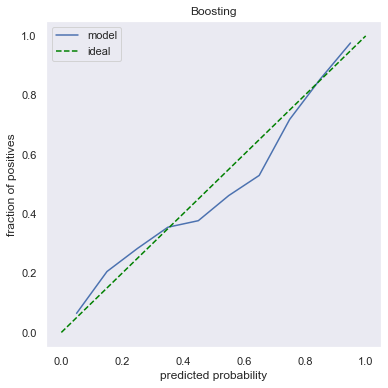

In [ ]:
np.random.seed(1)

boosting_best = Boosting(base_model_params={'max_depth':21,
                                              'min_samples_leaf':37,
                                              'min_samples_split':28},
                           n_estimators=59,
                           learning_rate=0.88,
                           subsample=0.46,
                           early_stopping_rounds=8)

boosting_best.fit(x_train, y_train, x_valid, y_valid)

pred_probs = boosting_best.predict_proba(x_test)

plot_calibration_curve(y_test, pred_probs[:, 1])
plt.title('Boosting');

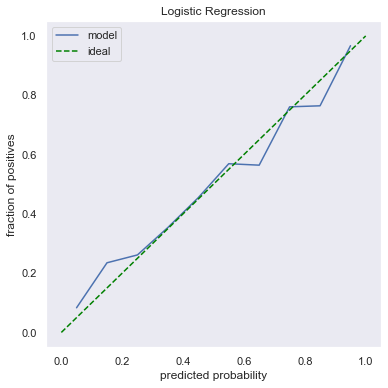

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(x_train, y_train)
pred_probs_lr = LogReg.predict_proba(x_test)

plot_calibration_curve(y_test, pred_probs_lr[:, 1])
plt.title('Logistic Regression');

Логистическая регрессия направлена на предсказания вероятностей, поэтому ее калибровочная кривая ближе к идеальной. Бустинг же не так хорошо приближает вероятности, к тому же его предсказания очень разняться от перезапуска к перезапуску.

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

In [5]:
from __future__ import annotations

from collections import defaultdict

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor

import pandas as pd


def score(clf, x, y):
    return roc_auc_score(y == 1, clf.predict_proba(x)[:, 1])

class Boosting2:

    def __init__(
            self,
            base_model_params: dict = None,
            n_estimators: int = 10,
            learning_rate: float = 0.1,
            subsample: float = 0.3,
            early_stopping_rounds: int = None,
            plot: bool = False,
    ):
        self.base_model_class = DecisionTreeRegressor
        self.base_model_params: dict = {} if base_model_params is None else base_model_params

        self.n_estimators: int = n_estimators

        self.models: list = []
        self.gammas: list = []

        self.learning_rate: float = learning_rate
        self.subsample: float = subsample

        self.early_stopping_rounds: int = early_stopping_rounds
        if early_stopping_rounds is not None:
#             self.validation_loss = np.full(self.early_stopping_rounds, np.inf)
            self.validation_loss = []

        self.plot: bool = plot

        self.history = defaultdict(list)

        self.sigmoid = lambda x: 1 / (1 + np.exp(-x))
        self.loss_fn = lambda y, z: -np.log(self.sigmoid(y * z)).mean()
        self.loss_derivative = lambda y, z: -y * self.sigmoid(-y * z)

    def fit_new_base_model(self, x, y, predictions):
        # бутстрап выборка:
        idx = np.random.randint(x.shape[0], size=int(np.round(self.subsample*x.shape[0])))
        x_boot = x[idx,:]

        s_i = -self.loss_derivative(y[idx], predictions[idx])

        base_model = self.base_model_class(**self.base_model_params)
        base_model.fit(x_boot, s_i)

        pred = base_model.predict(x)

        gamma_optim = self.find_optimal_gamma(y, predictions, pred)

        predictions = predictions + self.learning_rate*gamma_optim*pred

        self.models.append(base_model)
        self.gammas.append(gamma_optim)

        return predictions

    def fit(self, x_train, y_train, x_valid, y_valid):
        """
        :param x_train: features array (train set)
        :param y_train: targets array (train set)
        :param x_valid: features array (validation set)
        :param y_valid: targets array (validation set)
        """
        train_predictions = np.zeros(y_train.shape[0])
        valid_predictions = np.zeros(y_valid.shape[0])

        for i in range(self.n_estimators):
            train_predictions = self.fit_new_base_model(x_train, y_train, train_predictions)
            valid_predictions = valid_predictions + self.learning_rate*self.gammas[-1]*self.models[-1].predict(x_valid)
            train_loss = self.loss_fn(y_train, train_predictions)
            val_loss = self.loss_fn(y_valid, valid_predictions)

            self.history['train'].append(train_loss)
            self.history['val'].append(val_loss)

            if (self.early_stopping_rounds is not None) & (i > 0):
                diff = self.history['val'][i-1] - val_loss
                if np.abs(diff) <= 0.005:
                    self.validation_loss.append(val_loss)
                    if len(self.validation_loss) == self.early_stopping_rounds:
                        break
                    else:
                        continue
                else:
                    if len(self.validation_loss) == 0:
                        continue
                    else:
                        self.validation_loss = []

        if self.plot:
            plt.figure(figsize=(12, 7))
            length = len(self.history['train'])
            sns.lineplot(x=np.arange(1, length+1), y=self.history['train'])
            sns.lineplot(x=np.arange(1, length+1), y=self.history['val'])
            plt.legend(['train', 'validation'])


    def predict_proba(self, x):
        y_pred = np.zeros(x.shape[0])

        for gamma, model in zip(self.gammas, self.models):
            y_pred += self.learning_rate*gamma*model.predict(x)

        y_prob = self.sigmoid(y_pred)

        return np.transpose(np.array([1-y_prob, y_prob]))

    def find_optimal_gamma(self, y, old_predictions, new_predictions) -> float:
        gammas = np.linspace(start=0, stop=1, num=100)
        losses = [self.loss_fn(y, old_predictions + gamma * new_predictions) for gamma in gammas]

        return gammas[np.argmin(losses)]

    def score(self, x, y):
        return score(self, x, y)

    @property
    def feature_importances_(self):
        importances = []

        for model in self.models:
            importances.append(model.feature_importances_)

        importances = np.mean(importances, axis=0)
        importances = pd.Series(importances)
        importances = (importances - importances.min())/(importances.max() - importances.min())
        importances = importances/importances.sum()
        importances = importances.sort_values(ascending=False)
        return importances

In [ ]:
np.random.seed(1)

m = Boosting2(base_model_params={'max_depth':21,
                                              'min_samples_leaf':37,
                                              'min_samples_split':28},
                           n_estimators=59,
                           learning_rate=0.88,
                           subsample=0.46,
                           early_stopping_rounds=8)
m.fit(x_train, y_train, x_valid, y_valid)
importances = m.feature_importances_
print(f'Test ROC-AUC {m.score(x_test, y_test):.4f}')

Test ROC-AUC 0.9334


In [ ]:
importances

166    0.533951
164    0.199297
165    0.036101
168    0.031187
36     0.024902
         ...   
69     0.000000
70     0.000000
71     0.000000
72     0.000000
84     0.000000
Length: 169, dtype: float64

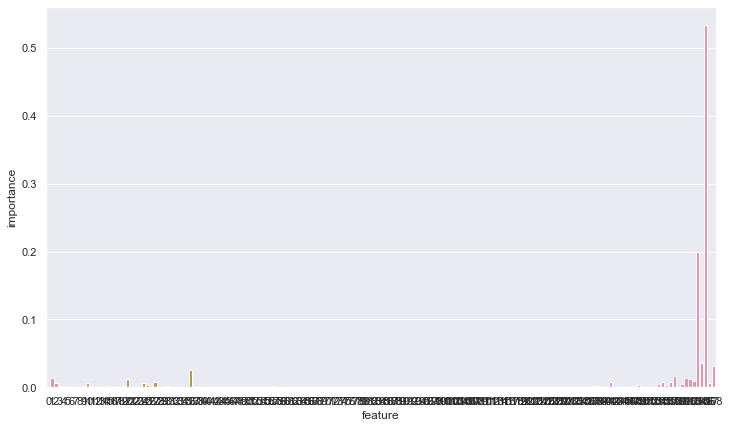

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x=importances.index, y=importances.values)
plt.xlabel('feature')
plt.ylabel('importance');

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [ ]:
top = importances[importances != 0]

In [ ]:
top_idx = top.index
top_idx

Int64Index([166, 164, 165, 168,  36, 158, 161,   1, 162,  20, 163, 155, 157,
            142,  27,  10, 167,  24,   2, 160, 154, 149, 156,  25, 139, 138,
             15,   3, 148,   9,  57,  30,  19, 159, 116, 135, 151, 150, 143,
             62,   5, 121, 136, 141, 137,  12, 130, 153, 128,  23, 147, 114,
             31, 152, 129,  21],
           dtype='int64')

In [ ]:
np.random.seed(1)

m_top30 = Boosting2(base_model_params={'max_depth':21,
                                              'min_samples_leaf':37,
                                              'min_samples_split':28},
                           n_estimators=59,
                           learning_rate=0.88,
                           subsample=0.46,
                           early_stopping_rounds=8)
m_top30.fit(x_train[:, top_idx], y_train, x_valid[:, top_idx], y_valid)
print(f'Test ROC-AUC {m_top30.score(x_test[:, top_idx], y_test):.4f}')

Test ROC-AUC 0.9337


Качество самую малость выросло, но результат может меняться, если перезапускать.

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [14]:
def score(clf, x, y):
    return roc_auc_score(y == 1, clf.predict_proba(x)[:, 1])

class Boosting3:

    def __init__(
            self,
            base_model_params: dict = None,
            n_estimators: int = 10,
            learning_rate: float = 0.1,
            subsample: float = 0.3,
            early_stopping_rounds: int = None,
            plot: bool = False,
    ):
        self.base_model_class = DecisionTreeRegressor
        self.base_model_params: dict = {} if base_model_params is None else base_model_params

        self.n_estimators: int = n_estimators

        self.models: list = []
        self.gammas: list = []

        self.learning_rate: float = learning_rate
        self.subsample: float = subsample

        self.early_stopping_rounds: int = early_stopping_rounds
        if early_stopping_rounds is not None:
#             self.validation_loss = np.full(self.early_stopping_rounds, np.inf)
            self.validation_loss = []

        self.plot: bool = plot

        self.history = defaultdict(list)

        self.sigmoid = lambda x: 1 / (1 + np.exp(-x))
        self.loss_fn = lambda y, z: -np.log(self.sigmoid(y * z)).mean()
        self.loss_derivative = lambda y, z: -y * self.sigmoid(-y * z)

    def fit_new_base_model(self, x, y, predictions):
        # бутстрап выборка:
        idx = np.random.randint(x.shape[0], size=int(np.round(self.subsample*x.shape[0])))
        x_boot = x[idx,:]

        s_i = -self.loss_derivative(y[idx], predictions[idx])

        base_model = self.base_model_class(**self.base_model_params)
        base_model.fit(x_boot, s_i)

        pred = base_model.predict(x)

        gamma_optim = self.find_optimal_gamma(y, predictions, pred)

        predictions = predictions + self.learning_rate*gamma_optim*pred

        self.models.append(base_model)
        self.gammas.append(gamma_optim)

        return predictions

    def fit(self, x_train, y_train, x_valid, y_valid):
        """
        :param x_train: features array (train set)
        :param y_train: targets array (train set)
        :param x_valid: features array (validation set)
        :param y_valid: targets array (validation set)
        """
        train_predictions = np.zeros(y_train.shape[0])
        valid_predictions = np.zeros(y_valid.shape[0])

        for i in range(self.n_estimators):
            train_predictions = self.fit_new_base_model(x_train, y_train, train_predictions)
            valid_predictions = valid_predictions + self.learning_rate*self.gammas[-1]*self.models[-1].predict(x_valid)
            train_loss = self.loss_fn(y_train, train_predictions)
            val_loss = self.loss_fn(y_valid, valid_predictions)

            self.history['train'].append(train_loss)
            self.history['val'].append(val_loss)

            if (self.early_stopping_rounds is not None) & (i > 0):
                diff = self.history['val'][i-1] - val_loss
                if np.abs(diff) <= 0.005:
                    self.validation_loss.append(val_loss)
                    if len(self.validation_loss) == self.early_stopping_rounds:
                        break
                    else:
                        continue
                else:
                    if len(self.validation_loss) == 0:
                        continue
                    else:
                        self.validation_loss = []

        if self.plot:
            plt.figure(figsize=(12, 7))
            length = len(self.history['train'])
            sns.lineplot(x=np.arange(1, length+1), y=self.history['train'])
            sns.lineplot(x=np.arange(1, length+1), y=self.history['val'])
            plt.legend(['train', 'validation'])


    def predict_proba(self, x):
        y_pred = np.zeros(x.shape[0])

        for gamma, model in zip(self.gammas, self.models):
            y_pred += self.learning_rate*gamma*model.predict(x)

        y_prob = self.sigmoid(y_pred)

        return np.transpose(np.array([1-y_prob, y_prob]))

    def predict(self, x):
        y_pred = np.zeros(x.shape[0])

        for gamma, model in zip(self.gammas, self.models):
            y_pred += self.learning_rate*gamma*model.predict(x)

        return y_pred

    def find_optimal_gamma(self, y, old_predictions, new_predictions) -> float:
        gammas = np.linspace(start=0, stop=1, num=100)
        losses = [self.loss_fn(y, old_predictions + gamma * new_predictions) for gamma in gammas]

        return gammas[np.argmin(losses)]

    def score(self, x, y):
        return score(self, x, y)

    def get_params(self, *args, **kwargs): # добавим это, чтобы StackingClassifier работал
        return {}

    @property
    def feature_importances_(self):
        importances = []

        for model in self.models:
            importances.append(model.feature_importances_)

        importances = np.mean(importances, axis=0)
        importances = pd.Series(importances)
        importances = (importances - importances.min())/(importances.max() - importances.min())
        importances = importances/importances.sum()
        importances = importances.sort_values(ascending=False)
        return importances

In [19]:
# основа взята из https://machinelearningmastery.com/blending-ensemble-machine-learning-with-python/

def get_models():
    models = list()
    models.append(('boosting', Boosting3(base_model_params={'max_depth':21,
                                              'min_samples_leaf':37,
                                              'min_samples_split':28},
                           n_estimators=59,
                           learning_rate=0.88,
                           subsample=0.46,
                           early_stopping_rounds=8)))
    return models

# fit the blending ensemble
def fit_ensemble(models, X_train, X_val, y_train, y_val):
 # fit all models on the training set and predict on hold out set
    meta_X = list()
    for name, model in models:
 # fit in training set
        model.fit(X_train, y_train, X_val, y_val)
 # predict on hold out set
        yhat = model.predict(X_val)
 # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
 # store predictions as input for blending
        meta_X.append(yhat)
 # create 2d array from predictions, each set is an input feature
        meta_X = np.hstack(meta_X)
 # define blending model
    blender = LogisticRegression()
 # fit on predictions from base models
    blender.fit(meta_X, y_val)
    return blender

# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
 # make predictions with base models
    meta_X = list()
    for name, model in models:
 # predict with base model
        yhat = model.predict(X_test)
 # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
 # store prediction
        meta_X.append(yhat)
 # create 2d array from predictions, each set is an input feature
        meta_X = np.hstack(meta_X)
 # predict proba
    return blender.predict_proba(meta_X)

In [25]:
np.random.seed(1)

models = get_models()
blender = fit_ensemble(models, x_train, x_valid, y_train, y_valid)
yhat = predict_ensemble(models, blender, x_test)

In [26]:
from sklearn.metrics import roc_auc_score

score_blending = roc_auc_score(y_test == 1, yhat[:, 1])

print(f'Test ROC-AUC: {score_blending}')

Test ROC-AUC: 0.9333825888843579


Качество примерно такое же.

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [7]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 1.9 MB/s eta 0:00:00


In [8]:
import numpy as np

from catboost import CatBoostClassifier, Pool

CatBoost = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)

CatBoost.fit(x_train, y_train)

preds_proba = CatBoost.predict_proba(x_test)

0:	learn: 0.3802937	total: 51.4ms	remaining: 51.4ms
1:	learn: 0.3460453	total: 55.8ms	remaining: 0us


In [10]:
catboostscore = roc_auc_score(y_test == 1, preds_proba[:, 1])
print(f'Test ROC-AUC CatBoost: {catboostscore}')

Test ROC-AUC CatBoost: 0.8939366862796655


Наша модель лучше!